# [MATH2504 Programming of Simulation, Analysis, and Learning Systems at The University of Queensland](https://courses.smp.uq.edu.au/MATH2504/)

## Semester 2, 2022

# Practical H: Towards Project 3 - Dataframes

In this practical we work with `DataFrames.jl` towards project 3.

We use a small Kaggle datset dealing with [graduate admissions](https://www.kaggle.com/mohansacharya/graduate-admissions). We also placed a copy of it in the course's repo. See:

`https://raw.githubusercontent.com/yoninazarathy/ProgrammingCourse-with-Julia-SimulationAnalysisAndLearningSystems/main/data/Admission_Predict.csv`

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
1. TOEFL Scores ( out of 120 )
1. University Rating ( out of 5 )
1. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
1. Undergraduate GPA ( out of 10 )
1. Research Experience ( either 0 or 1 )
1. Chance of Admit ( ranging from 0 to 1 )

In [1]:
using DataFrames, HTTP, CSV, Plots, StatsPlots, StatsBase

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1423
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Warning: Keyword argument widen not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_ba

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423


In [2]:
data_from_web = HTTP.request("GET","https://raw.githubusercontent.com/yoninazarathy/"*
                "ProgrammingCourse-with-Julia-SimulationAnalysisAndLearningSystems/main/data/Admission_Predict.csv")
string_from_web = String(data_from_web.body);

In [4]:
df = CSV.read(IOBuffer(string_from_web), DataFrame)

Row,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Float64
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.0,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.8
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.9
7,7,321,109,3,3.0,4.0,8.2,1,0.75
8,8,308,101,2,3.0,4.0,7.9,0,0.68
9,9,302,102,1,2.0,1.5,8.0,0,0.5


In [5]:
names(df)

9-element Vector{String}:
 "Serial No."
 "GRE Score"
 "TOEFL Score"
 "University Rating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "Chance of Admit "

This is one way to access a column.

In [8]:
df[:,"GRE Score"] |> println

[337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340, 322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304, 307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312, 334, 324, 322, 320, 316, 298, 300, 311, 309, 307, 304, 315, 325, 325, 327, 316, 318, 328, 332, 336, 321, 314, 314, 329, 327, 301, 296, 294, 312, 340, 320, 322, 340, 319, 315, 317, 314, 316, 318, 299, 298, 301, 303, 304, 306, 331, 332, 323, 322, 312, 314, 317, 326, 316, 329, 338, 331, 304, 305, 321, 301, 320, 311, 310, 299, 290, 296, 327, 335, 334, 310, 308, 301, 300, 323, 319, 326, 333, 339, 303, 309, 323, 333, 314, 312, 316, 326, 318, 329, 332, 331, 340, 325, 320, 315, 326, 339, 311, 334, 332, 321, 324, 326, 312, 315, 309, 306, 297, 315, 298, 318, 317, 329, 322, 302, 313, 293, 311, 312, 334, 322, 323, 321, 320, 329, 319, 309, 307, 300, 305, 299, 314, 316, 327, 317, 335, 331, 324, 324, 323, 322, 336, 316, 307, 306, 310, 311, 313,

But better to rename the columns to be without white space.

In [9]:
rename!(df, "GRE Score" => "GREScore");

Then we can access it in an easier manner.

In [12]:
df.GREScore |> println

[337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328, 307, 311, 314, 317, 319, 318, 303, 312, 325, 328, 334, 336, 340, 322, 298, 295, 310, 300, 327, 338, 340, 331, 320, 299, 300, 304, 307, 308, 316, 313, 332, 326, 322, 329, 339, 321, 327, 313, 312, 334, 324, 322, 320, 316, 298, 300, 311, 309, 307, 304, 315, 325, 325, 327, 316, 318, 328, 332, 336, 321, 314, 314, 329, 327, 301, 296, 294, 312, 340, 320, 322, 340, 319, 315, 317, 314, 316, 318, 299, 298, 301, 303, 304, 306, 331, 332, 323, 322, 312, 314, 317, 326, 316, 329, 338, 331, 304, 305, 321, 301, 320, 311, 310, 299, 290, 296, 327, 335, 334, 310, 308, 301, 300, 323, 319, 326, 333, 339, 303, 309, 323, 333, 314, 312, 316, 326, 318, 329, 332, 331, 340, 325, 320, 315, 326, 339, 311, 334, 332, 321, 324, 326, 312, 315, 309, 306, 297, 315, 298, 318, 317, 329, 322, 302, 313, 293, 311, 312, 334, 322, 323, 321, 320, 329, 319, 309, 307, 300, 305, 299, 314, 316, 327, 317, 335, 331, 324, 324, 323, 322, 336, 316, 307, 306, 310, 311, 313,

In [13]:
names(df)

9-element Vector{String}:
 "Serial No."
 "GREScore"
 "TOEFL Score"
 "University Rating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "Chance of Admit "

In [14]:
rename!(df,"Serial No."=>"SerialNo");
rename!(df,"TOEFL Score"=>"TOEFLScore");
rename!(df,"University Rating"=>"UniversityRating");
rename!(df,"Chance of Admit "=>"ChanceofAdmit");#notice that original name came with extra whitespace

In [15]:
names(df)

9-element Vector{String}:
 "SerialNo"
 "GREScore"
 "TOEFLScore"
 "UniversityRating"
 "SOP"
 "LOR "
 "CGPA"
 "Research"
 "ChanceofAdmit"

Summary statistics on a column.

In [17]:
summarystats(df.GREScore)

Summary Stats:
Length:         400
Missing Count:  0
Mean:           316.807500
Minimum:        290.000000
1st Quartile:   308.000000
Median:         317.000000
3rd Quartile:   325.000000
Maximum:        340.000000


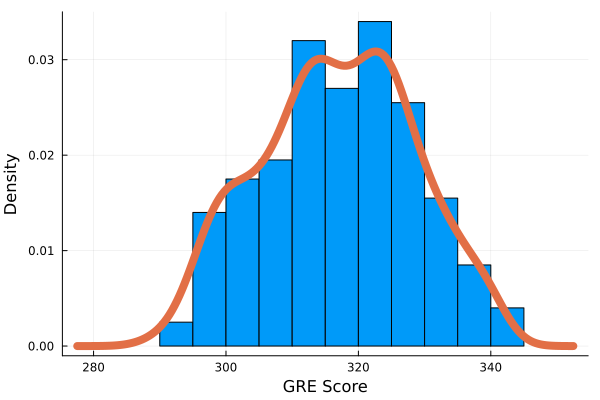

In [18]:
histogram(df.GREScore, legend = false, xlabel = "GRE Score", ylabel = "Density",normed=true)
density!(df.GREScore,lw=8)

With this dataset, we can view "Chance of admit" a variable that we wish to predict.

In [19]:
summarystats(df.ChanceofAdmit)

Summary Stats:
Length:         400
Missing Count:  0
Mean:           0.724350
Minimum:        0.340000
1st Quartile:   0.640000
Median:         0.730000
3rd Quartile:   0.830000
Maximum:        0.970000


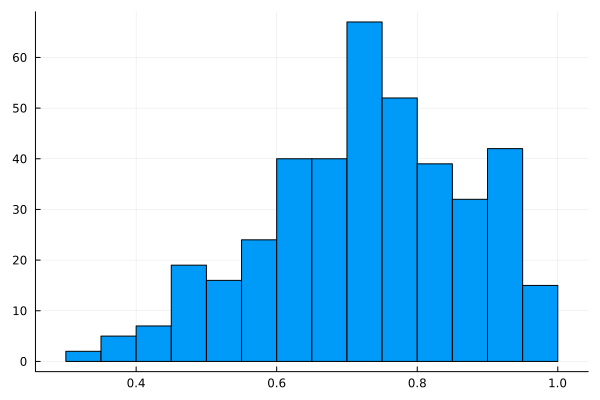

In [20]:
histogram(df.ChanceofAdmit, label = false)

We can also see relationships.

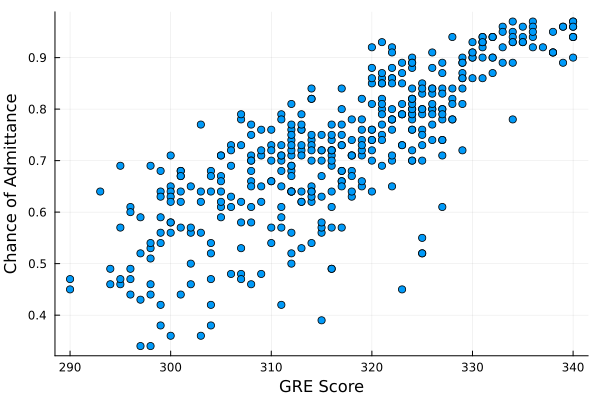

In [21]:
scatter(df.GREScore, df.ChanceofAdmit, label = false, 
            xlabel = "GRE Score", ylabel = "Chance of Admittance")

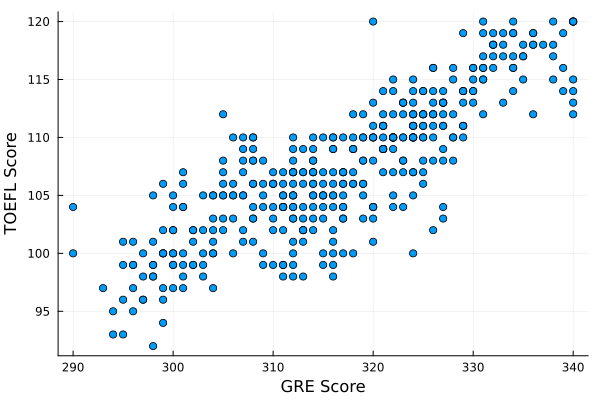

In [22]:
scatter(df.GREScore, df.TOEFLScore, label = false, 
            xlabel = "GRE Score", ylabel = "TOEFL Score")

Here are "all of the values" for one variable/column.

In [24]:
unique(df.Research)

2-element Vector{Int64}:
 1
 0

In [25]:
counts(df.Research)

2-element Vector{Int64}:
 181
 219

And here we can see how this binary/categorical "research" variable is related to the distribution of the TOEFL score.

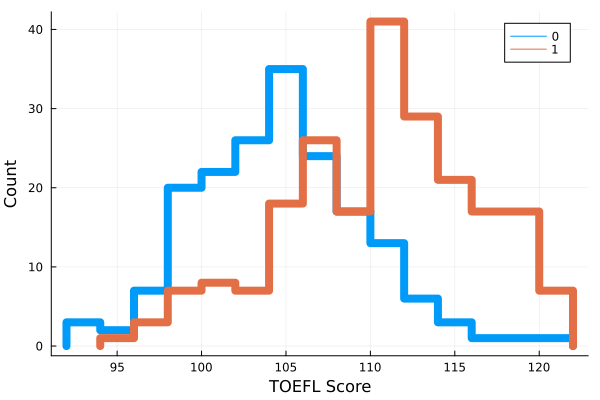

In [26]:
stephist(df.TOEFLScore, bins=20, group = df.Research, 
            lw = 8, xlabel = "TOEFL Score", ylabel= "Count")

Or the GRE Score, yet via a density plot.

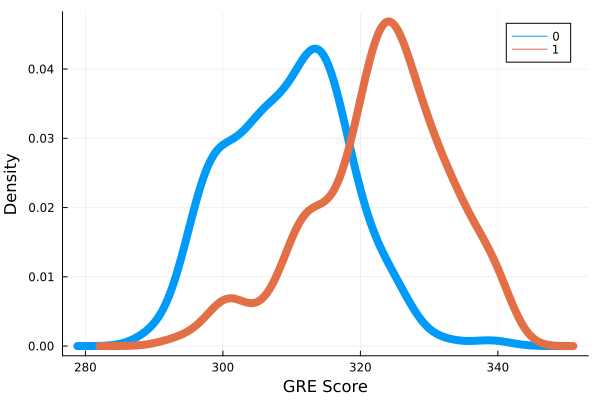

In [27]:
density(df.GREScore, bins=20, group = df.Research,
        lw = 8, xlabel = "GRE Score", ylabel = "Density")

It is sometimes useful to convert a dataframe to a matrix. 

In [31]:
X = sort(df[:,[:ChanceofAdmit,:GREScore, :TOEFLScore, :CGPA, :UniversityRating ]], :ChanceofAdmit) |> Tables.Matrix |> float

400×5 Matrix{Float64}:
 0.34  298.0   98.0  8.03  2.0
 0.34  297.0   96.0  7.43  2.0
 0.36  300.0   99.0  6.8   1.0
 0.36  303.0   99.0  7.66  3.0
 0.38  299.0   97.0  7.66  3.0
 0.38  304.0  101.0  7.66  2.0
 0.39  315.0  105.0  7.65  2.0
 0.42  311.0  104.0  8.3   2.0
 0.42  304.0  100.0  7.84  4.0
 0.42  299.0   94.0  7.34  1.0
 0.43  297.0   96.0  7.89  2.0
 0.44  298.0   98.0  7.5   2.0
 0.44  296.0   95.0  7.54  2.0
 ⋮                         
 0.95  333.0  117.0  9.66  4.0
 0.96  336.0  112.0  9.76  5.0
 0.96  340.0  120.0  9.5   4.0
 0.96  339.0  114.0  9.76  5.0
 0.96  339.0  116.0  9.8   4.0
 0.96  333.0  119.0  9.78  5.0
 0.96  340.0  113.0  9.74  4.0
 0.96  335.0  117.0  9.82  5.0
 0.97  336.0  119.0  9.8   5.0
 0.97  340.0  120.0  9.92  4.0
 0.97  340.0  120.0  9.91  5.0
 0.97  334.0  120.0  9.87  5.0

Here is a plot of the matrix, yet it isn't too instructive.

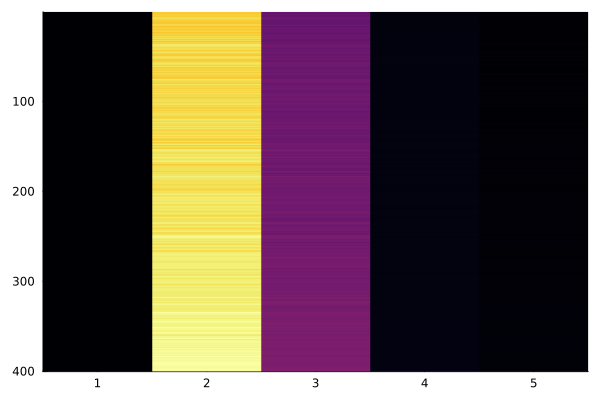

In [32]:
heatmap(X, yflip=true, legend = false)

We can also standardize the data and then the plot will be on a uniform scale.

In [38]:
Z = (X .- mean(X, dims = 1)) ./ std(X, dims = 1)

400×5 Matrix{Float64}:
 -2.69513  -1.63919   -1.55037   -0.954065  -0.950838
 -2.69513  -1.72635   -1.87989   -1.96024   -0.950838
 -2.55488  -1.46488   -1.38561   -3.01673   -1.82517
 -2.55488  -1.20341   -1.38561   -1.57454   -0.0765042
 -2.41464  -1.55203   -1.71513   -1.57454   -0.0765042
 -2.41464  -1.11625   -1.0561    -1.57454   -0.950838
 -2.34452  -0.157535  -0.397066  -1.59131   -0.950838
 -2.13415  -0.50616   -0.561824  -0.501285  -0.950838
 -2.13415  -1.11625   -1.22086   -1.27269    0.797829
 -2.13415  -1.55203   -2.2094    -2.11117   -1.82517
 -2.06403  -1.72635   -1.87989   -1.18884   -0.950838
 -1.99391  -1.63919   -1.55037   -1.84285   -0.950838
 -1.99391  -1.8135    -2.04464   -1.77578   -0.950838
  ⋮                                         
  1.58229   1.41128    1.58003    1.77938    0.797829
  1.65242   1.67275    0.756239   1.94708    1.67216
  1.65242   2.02137    2.0743     1.51107    0.797829
  1.65242   1.93422    1.08575    1.94708    1.67216
  1.65242   1.93

Now some visual relationship emerges.

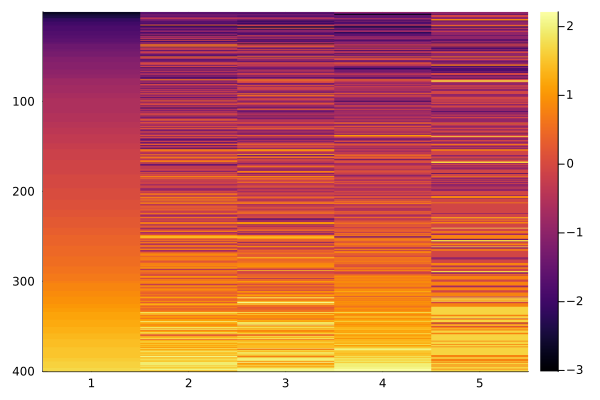

In [39]:
heatmap(Z, yflip=true)

When predicting, one way is to split the data into training and validation.

In [40]:
n, _ = size(df)

(400, 9)

In [41]:
using Random
Random.seed!(0)
p_validate = 0.2
n_validate = floor(Int, p_validate*n)
validate_index_set = sample(1:n, n_validate, replace = false)
train_index_set = setdiff(1:n, validate_index_set);

In [35]:
n_validate = length(validate_index_set)
n_train = length(train_index_set)
n_train, n_validate

(320, 80)

In [51]:
df_train = df[train_index_set,:]
df_validate = df[validate_index_set,:];

Now lets do some basic logistic regression.

In [53]:
using GLM

In [55]:
model1 = glm(@formula(ChanceofAdmit ~ GREScore), df_train, Binomial(), LogitLink())
model2 = glm(@formula(ChanceofAdmit ~ GREScore + TOEFLScore), df_train, Binomial(), LogitLink())
model3 = glm(@formula(ChanceofAdmit ~ GREScore + TOEFLScore + CGPA), df_train, Binomial(), LogitLink());
model4 = glm(@formula(ChanceofAdmit ~ GREScore + TOEFLScore + CGPA + UniversityRating), df_train, Binomial(), LogitLink());


And here are some plots of the predicted values against the actual values. Ideally they would lie on the "identity line".

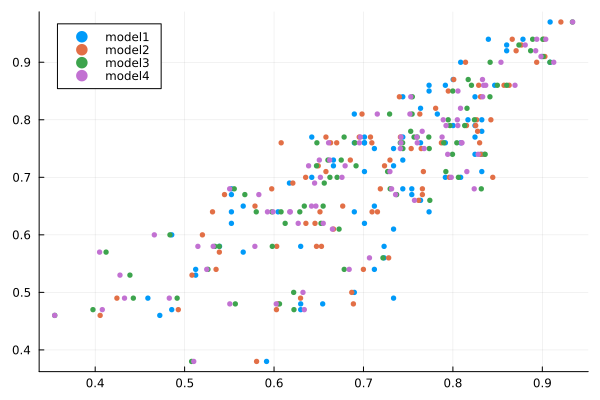

In [63]:
scatter(predict(model1, df_validate),df_validate.ChanceofAdmit, label = "model1", ms=3, msw=0)
scatter!(predict(model2, df_validate),df_validate.ChanceofAdmit, label = "model2", ms=3, msw=0)
scatter!(predict(model3, df_validate),df_validate.ChanceofAdmit, label = "model3", ms=3, msw=0)
scatter!(predict(model4, df_validate),df_validate.ChanceofAdmit, label = "model4", ms=3, msw=0, legend = :topleft)

We can quantify this via MSE (using Cross Entropy would have been better) - but for simplicity let us stick to MSE here.

In [64]:
mse(y,ŷ) = sqrt(sum((y-ŷ).^2))  #y + \hat + [TAB]

mse (generic function with 1 method)

In [65]:
[mse(predict(model, df_validate), df_validate.ChanceofAdmit) for model in [model1, model2, model3, model4]]

4-element Vector{Float64}:
 0.7991567783835615
 0.734560820199849
 0.6243788942404922
 0.6268086125755794

We can see that adding variables makes the models "better" until we get to model4.